In [73]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [90]:
test = case3_1.query(f'''
        model == "RandomForestRegressor" and \
        imp_type != "pps" and dataset == "boston"\
                ''')

In [119]:
test.head(12)

,iteration,dropped_feature,feat_ind,feat_name,mse_train,mse_test,model,imp_type,dataset,random_state,...,f_cnt_10perc,f_cnt_20perc,f_cnt_30perc,mse_delta,mse_perc,feature_cnt,pp_coef,max_perc,feature_dropped,feature_dropped_perc
0,0,full_set,1,ZN,1.363997,14.497125,RandomForestRegressor,gini,boston,0,...,1,3,4,0.000000,0.000000,13,1.000000,0.053891,0,0.00
1,1,ZN,3,CHAS,1.364141,13.912701,RandomForestRegressor,gini,boston,0,...,1,3,4,0.584424,0.040313,12,1.042007,0.053891,1,0.08
2,2,CHAS,8,RAD,1.394400,14.362875,RandomForestRegressor,gini,boston,0,...,1,3,4,0.134251,0.009261,11,1.009347,0.053891,2,0.15
3,3,RAD,2,INDUS,1.334608,13.748990,RandomForestRegressor,gini,boston,0,...,1,3,4,0.748135,0.051606,10,1.054414,0.053891,3,0.23
4,4,INDUS,11,B,1.403627,13.715857,RandomForestRegressor,gini,boston,0,...,1,3,4,0.781268,0.053891,9,1.056961,0.053891,4,0.31
5,5,B,6,AGE,1.381084,14.348363,RandomForestRegressor,gini,boston,0,...,1,3,4,0.148763,0.010262,8,1.010368,0.053891,5,0.38
6,6,AGE,4,NOX,1.352943,14.582610,RandomForestRegressor,gini,boston,0,...,1,3,4,-0.085485,-0.005897,7,0.994138,0.053891,6,0.46
7,7,NOX,9,TAX,1.458686,15.295732,RandomForestRegressor,gini,boston,0,...,1,3,4,-0.798606,-0.055087,6,0.947789,0.053891,7,0.54
8,8,TAX,10,PTRATIO,1.553945,15.605658,RandomForestRegressor,gini,boston,0,...,1,3,4,-1.108533,-0.076466,5,0.928966,0.053891,8,0.62
9,9,PTRATIO,7,DIS,1.746861,15.630161,RandomForestRegressor,gini,boston,0,...,1,3,4,-1.133036,-0.078156,4,0.927510,0.053891,9,0.69


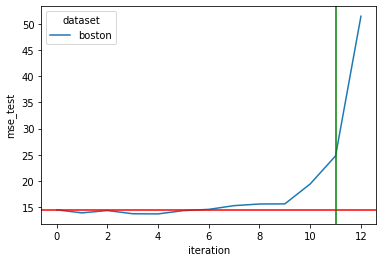

In [117]:
case3_1 = df_full
case3_1 = case3_1.drop_duplicates()
case3_1['feature_dropped_perc'] = case3_1.feature_dropped_perc.round(decimals=2)

case3_1
plot = sns.lineplot(x='iteration', y='mse_test', hue='dataset', ci=0,
            data=case3_1.query(f'''
        model == "RandomForestRegressor" and imp_type == "gini" and \
        imp_type != "pps" and dataset == "boston" and data_split == 0 and random_state == 0\
                ''')
            )
plot.axhline(14.497, 0,1, linewidth=1.5, color='r')
plot.axvline(11, 0,1, linewidth=1.5, color='g')
# plot.axvline(0.9, 0,1, linewidth=1, color='b')

In [120]:
# plot.save
fig = plot.get_figure()

fig.savefig('prezentācija2.png', dpi=300)

In [74]:
# # old stuff

# df1 = pd.read_csv('regression_real_data_ds0_7_rs10_big.csv')

# df2 = pd.read_csv('regression_real_data_ds6_rs10_2021-Apr-12-10:46:10.csv')

# df3 = pd.concat([df1, df2])

# df3.to_csv('regression_real_data_ds0_9_rs10_small.csv',index = False)

In [75]:
# plot = sns.lineplot(x='iteration', y='mse_test', hue='imp_type', ci=95,
#             data=df.query(f'''
#         model == "RandomForestRegressor" and \
#         imp_type == "gini" and data_split == 0 and \
#         dataset == "boston" and random_state == 0 
#                 ''')
#             )

In [76]:
model = "RandomForestRegressor"
df = pd.read_csv('regression_real_data_ds0_9_rs10_small.csv')
init_shape = df.shape
df = df.query(f'model == "{model}"')
filtered_shape = df.shape

In [27]:
# pretty_repr = ['iteration', 'dropped_feature', 'feat_name', 'mse_train',
#        'mse_test', 'model', 'imp_type', 'dataset', 'random_state',
#        'data_split']
# pretty = df[pretty_repr].head(13)

# pretty.rename(columns={'random_state': 'model_seed',
#                         'data_split': 'data_split_seed'})

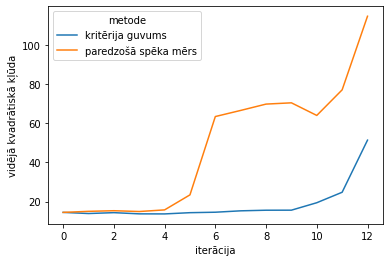

In [79]:
# pretty = df
# pretty['imp_type'] = pretty.imp_type.str.replace('gini', 'kritērija guvums')
# pretty['imp_type'] = pretty.imp_type.str.replace('pps', 'paredzošā spēka mērs')
# pretty['imp_type'] = pretty.imp_type.str
# pretty = pretty.rename(columns={
#                        'mse_test': 'vidējā kvadrātiskā kļūda',
#                        'imp_type': 'metode',
#                        'iteration': 'iterācija'}
#                       )
# plot = sns.lineplot(x='iterācija', y='vidējā kvadrātiskā kļūda', 
#                     hue='metode', ci=0,
#             data=pretty.query(f'''
#         model == "RandomForestRegressor" and \
#         metode == ["kritērija guvums", "paredzošā spēka mērs"] and dataset == "boston" and \
#         data_split == 0 and random_state == 0''')
#             )


In [69]:
# pretty_repr = ['iteration', 'dropped_feature', 'feat_name', 'mse_train',
#        'mse_test', 'pp_coef', 'model', 'imp_type', 'dataset', 'random_state',
#        'data_split']
# pretty = df_full[pretty_repr].head(13)

# pretty = pretty.rename(columns={'random_state': 'model_seed',
#                        'data_split': 'data_split_seed',
#                        'pp_coef': 'predictive_power'})

In [72]:
# fig = plot.get_figure()

# fig.savefig('prezentācija.png', dpi=300)

In [7]:
init_shape, filtered_shape

((604800, 11), (201600, 11))

In [9]:
original_cols = df.columns.tolist()
original_shape = df.shape; original_shape

(201600, 11)

In [10]:
# add global metric minima column - init_mse_test
# idx == key, 
# cols - idx == cols to add
cols = ['dataset', 'random_state', 'data_split', 'model', 'imp_type', 'mse_test']
idx = ['dataset', 'random_state', 'data_split', 'model', 'imp_type']

init_metric = df.query('dropped_feature == "full_set"')
init_metric = init_metric.groupby(idx).mse_test.max()
init_metric = init_metric.rename('init_mse_test')

# merge into original df
df_full = pd.merge(df, init_metric, on=idx, how='inner')
original_shape, df_full.shape

((201600, 11), (201600, 12))

In [11]:
# add columns related to {max, curr} feature counts, feature_count relative percentages
# idx == key 
# cols - idx == cols to add

cols = ['dataset', 'iteration']
idx = ['dataset']
max_feature_cnt = df[cols]
max_feature_cnt = max_feature_cnt.groupby(idx).max() + 1

max_feature_cnt['f_cnt_10perc'] = np.round((max_feature_cnt.iteration * 0.1)).astype(int)
max_feature_cnt['f_cnt_20perc'] = np.round((max_feature_cnt.iteration * 0.2)).astype(int)
max_feature_cnt['f_cnt_30perc'] = np.round((max_feature_cnt.iteration * 0.3)).astype(int)
max_feature_cnt = max_feature_cnt.rename(columns={'iteration':'max_feature_cnt'})

# merge into original df
df_full = pd.merge(df_full, max_feature_cnt, on=idx, how='inner')
original_shape, df_full.shape

((201600, 11), (201600, 16))

In [12]:
df_full['mse_delta'] = df_full.init_mse_test - df_full.mse_test
df_full['mse_perc'] = df_full.mse_delta / df_full.init_mse_test
df_full['feature_cnt'] = df_full.max_feature_cnt - df_full.iteration
df_full['pp_coef'] = df_full.init_mse_test / df_full.mse_test
# df_full['pp_coef'] = df_full.init_mse_test / df_full.mse_test

# max_perc grouping
grouping = ['dataset', 'random_state', 'data_split', 'model', 'imp_type']

# select all non-base models
max_perc = df_full.query('iteration > 0')
max_perc = max_perc.groupby(grouping).mse_perc.max()
max_perc = max_perc.rename('max_perc')

df_full = pd.merge(df_full, max_perc, on=grouping, how='inner')
original_shape, df_full.shape

((201600, 11), (201600, 21))

In [13]:
# grouping = ['dataset', 'random_state', 'data_split', 'model', 'imp_type']

# max_perc = df_full.query('iteration > 0')
# max_perc = max_perc.groupby(grouping).mse_perc.max()
# max_perc = max_perc.rename('max_perc')

# df_full = df_full.join(max_perc, on=grouping)

In [14]:
df_full['feature_dropped'] =  df_full.max_feature_cnt - df_full.feature_cnt
df_full['feature_dropped_perc'] = (1 - (df_full.max_feature_cnt - df_full.feature_dropped) 
                                   / df_full.max_feature_cnt)

In [15]:
repr_lst = ['iteration', 'mse_test'] + df_full.columns[5:].to_list()

In [16]:
df_res = df_full[repr_lst]

In [17]:
df_res

,iteration,mse_test,mse_test,model,imp_type,dataset,random_state,data_split,init_mse_test,max_feature_cnt,f_cnt_10perc,f_cnt_20perc,f_cnt_30perc,mse_delta,mse_perc,feature_cnt,pp_coef,max_perc,feature_dropped,feature_dropped_perc
0,0,1.449713e+01,1.449713e+01,RandomForestRegressor,gini,boston,0,1,1.449713e+01,13,1,3,4,0.000000e+00,0.000000,13,1.000000,0.053891,0,0.000000
1,1,1.391270e+01,1.391270e+01,RandomForestRegressor,gini,boston,0,1,1.449713e+01,13,1,3,4,5.844240e-01,0.040313,12,1.042007,0.053891,1,0.076923
2,2,1.436287e+01,1.436287e+01,RandomForestRegressor,gini,boston,0,1,1.449713e+01,13,1,3,4,1.342507e-01,0.009261,11,1.009347,0.053891,2,0.153846
3,3,1.374899e+01,1.374899e+01,RandomForestRegressor,gini,boston,0,1,1.449713e+01,13,1,3,4,7.481352e-01,0.051606,10,1.054414,0.053891,3,0.230769
4,4,1.371586e+01,1.371586e+01,RandomForestRegressor,gini,boston,0,1,1.449713e+01,13,1,3,4,7.812684e-01,0.053891,9,1.056961,0.053891,4,0.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,74,4.039373e+09,4.039373e+09,RandomForestRegressor,pps,ames_housing,9,9,6.307423e+08,79,8,16,24,-3.408631e+09,-5.404159,5,0.156149,0.027738,74,0.936709
201596,75,4.694087e+09,4.694087e+09,RandomForestRegressor,pps,ames_housing,9,9,6.307423e+08,79,8,16,24,-4.063345e+09,-6.442164,4,0.134370,0.027738,75,0.949367
201597,76,4.870230e+09,4.870230e+09,RandomForestRegressor,pps,ames_housing,9,9,6.307423e+08,79,8,16,24,-4.239488e+09,-6.721427,3,0.129510,0.027738,76,0.962025
201598,77,5.027057e+09,5.027057e+09,RandomForestRegressor,pps,ames_housing,9,9,6.307423e+08,79,8,16,24,-4.396315e+09,-6.970066,2,0.125469,0.027738,77,0.974684


In [18]:
# Case1: Can we get a metric improvement
# Case2: No decrease in metric
# Case3: Maximum interpretability (use [0.1, 0.2, 0.3] of all features)

In [19]:
# import matplotlib.pyplot as plt

In [20]:
# plot = sns.barplot(x='imp_type', y='max_perc', ci=95,
#             data=case_1, order=case_1.imp_type.unique().tolist()
#             )
# plot.axhline(y=0.013283, color='r', linestyle='-')

In [21]:
# confidence_interval = np.percentile(case_1.query('imp_type == "gini"').max_perc,[2.5,97.5])

Text(0, 0.5, 'best percent gain/loss with feature reduction from base model')

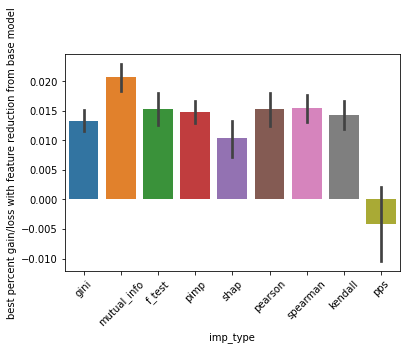

In [21]:
# Case1: Can we get a metric improvement
case_1 = (df_res.query('model == "RandomForestRegressor"')
    [['imp_type','max_perc','random_state', 'data_split', 'dataset']]); 
# case_1 = case_1.query('imp_type == "gini"')
case_1 = case_1.drop_duplicates();


# plot case_1 
plot = sns.barplot(x='imp_type', y='max_perc', ci=95,
            data=case_1, order=case_1.imp_type.unique().tolist()
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
plot.set_ylabel('best percent gain/loss with feature reduction from base model')

Text(0, 0.5, 'percent of features dropped without accuracy loss')

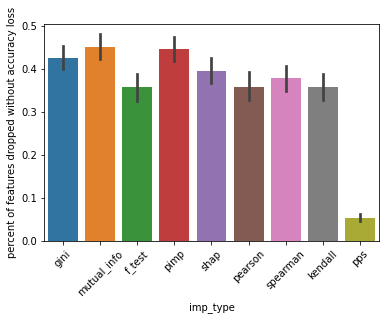

In [22]:
# Case2: No decrease in metric
# % features dropped without performance decrease
# case_2 = df_full.query('pp_coef > 1')
case_2 = df_full
# case_2 = case_2.query('mse_perc >= 0')

case_2['feature_dropped'] =  case_2.max_feature_cnt - case_2.feature_cnt

# 
case_2['feature_dropped_perc'] = (
                                    1 - (case_2.max_feature_cnt - case_2.feature_dropped)
                                      / case_2.max_feature_cnt
                                    )

grouping = ['imp_type', 'random_state', 
            'data_split', 'dataset']
max_dropped = case_2.query('pp_coef > 1')
max_dropped = (max_dropped[grouping + ['feature_dropped_perc']]
               .groupby(grouping).max())
max_dropped = max_dropped.rename(columns={"feature_dropped_perc": "max_dropped"})

case_2 = case_2[grouping].drop_duplicates()
case_2 = pd.merge(case_2, max_dropped, on=grouping, how='left')
case_2 = case_2.fillna(0)
# case_2 = case_2.query('feature_dropped_perc == max_dropped')

plot = sns.barplot(x='imp_type', y='max_dropped',
            data=case_2, order=case_1.imp_type.unique().tolist()
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
plot.set_ylabel('percent of features dropped without accuracy loss')

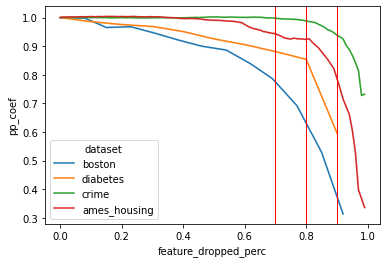

In [23]:
# Case 3: Maximum interpretability (drop [70%, 80%, 90%] of all features, rounded)
# Let's check out if there is a general pattern of dataset predictive power (pp) coef decrease
# over features dropped percentage

# For most datasets we see a significant decrease at around 80%ish features dropped
# the one exception is boston dataset which seems to drop in predictive power from 30%ish

# choosing to drop 70%, 80%, 90% seems like a reasonable way 
# to find maximally interpretable models that don't sacrifice the metric significantly

case3_1 = df_full[['feature_cnt', 'feature_dropped_perc', 'pp_coef', 'imp_type',
                  'random_state', 'data_split', 'dataset', 'model']]
case3_1 = case3_1.drop_duplicates()
case3_1['feature_dropped_perc'] = case3_1.feature_dropped_perc.round(decimals=2)

case3_1
plot = sns.lineplot(x='feature_dropped_perc', y='pp_coef', hue='dataset', ci=0,
            data=case3_1.query(f'''
        model == "RandomForestRegressor" and \
        imp_type != "pps"
                ''')
            )
plot.axvline(0.7, 0,1, linewidth=1, color='r')
plot.axvline(0.8, 0,1, linewidth=1, color='r')
plot.axvline(0.9, 0,1, linewidth=1, color='r')

In [24]:
sub1 = df_res[df_res.f_cnt_10perc == df_res.feature_cnt]
sub2 = df_res[df_res.f_cnt_20perc == df_res.feature_cnt]
sub3 = df_res[df_res.f_cnt_30perc == df_res.feature_cnt]

In [25]:
case3_2 = pd.concat([sub1, sub2, sub3])

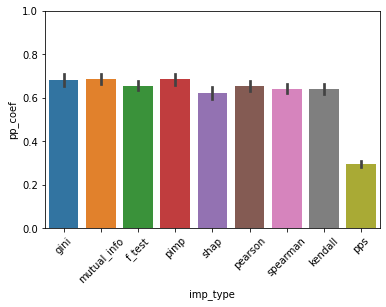

In [26]:
# 90% dropped
plot = sns.barplot(x='imp_type', y='pp_coef', hue='imp_type', ci=95, dodge=False,
            data=sub1, order=case_1.imp_type.unique().tolist()
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);
plot.set(ylim=[0,1])
plot.legend_.remove()

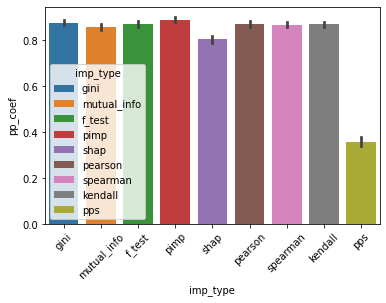

In [27]:
# 80% dropped
plot = sns.barplot(x='imp_type', y='pp_coef', hue='imp_type', ci=95, dodge=False,
            data=sub2, order=sub2.imp_type.unique().tolist()
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

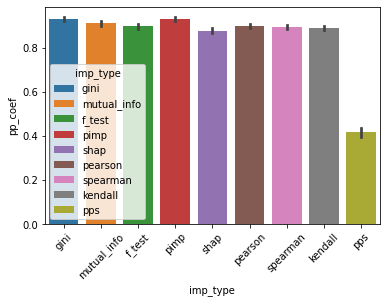

In [28]:
# 70% dropped
plot = sns.barplot(x='imp_type', y='pp_coef', hue='imp_type', ci=95, dodge=False,
            data=sub3, order=sub3.imp_type.unique().tolist()
            )
plot.set_xticklabels(plot.get_xticklabels(), rotation=45);

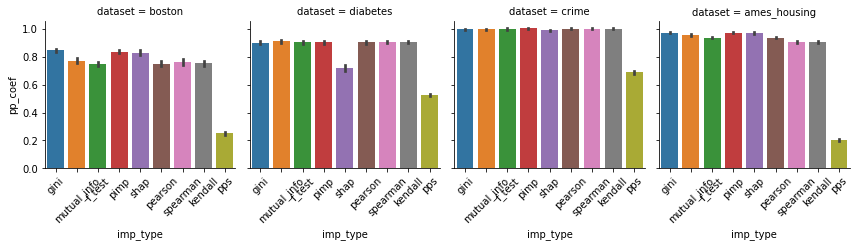

In [29]:
# Since all of the graphs above are aggregate graphs (all datasets together)
# It might be useful to also see the difference between datasets

# maybe turn this into a stacked bar chart stacks = [70%, 80%, 90%], pp_coef
g = sns.FacetGrid(sub3, col='dataset', hue='imp_type')
g.map(sns.barplot,'imp_type', 'pp_coef', ci=95, data=sub3, dodge=False, 
      order=sub3.imp_type.unique().tolist())
g.set_xticklabels(rotation=45)

# 70% dropped

In [30]:
# plot = sns.lineplot(x='iteration', y='mse_delta', hue='imp_type', ci=95, err_style='band',
#             data=df_full.query(f'dataset == "boston"')
#             )

In [31]:
# Case1: Can we get a metric improvement
# Case2: No decrease in metric HAS BUGS
# Case3: Maximum interpretability (use [0.1, 0.2, 0.3] of all features)

In [32]:
# 1 in table
var_dropped = case_2.groupby('imp_type').mean().max_dropped

In [33]:
# 2 in table
model_gain = case_1.groupby('imp_type').mean().max_perc

In [34]:
# 3 in table
minimal_model_acc = sub2[['imp_type', 'pp_coef']].groupby('imp_type').mean().squeeze()

In [35]:
def get_result_table():
    # Case1: Can we get a metric improvement
    # Case2: No decrease in metric
    # Case3: Maximum interpretability (use [0.1, 0.2, 0.3] of all features)
    # 1 in table
    var_dropped = case_2.groupby('imp_type').mean().max_dropped
    model_gain = case_1.groupby('imp_type').mean().max_perc
    minimal_model_acc = sub2[['imp_type', 'pp_coef']].groupby('imp_type').mean().squeeze()
    
    table = pd.DataFrame(
    {
        'variables_dropped': var_dropped,
        'model_gain': model_gain,
        'minimal_model_acc': minimal_model_acc
    }
    )
    return table

In [36]:
c = pd.DataFrame(
    {
        'variables_dropped': var_dropped,
        'model_gain': model_gain,
        'minimal_model_acc': minimal_model_acc
    }
); c

,variables_dropped,model_gain,minimal_model_acc
imp_type,,,
f_test,0.357720,0.015202,0.873352
gini,0.425158,0.013283,0.876925
kendall,0.357618,0.014272,0.870474
mutual_info,0.451206,0.020674,0.857763
pearson,0.357720,0.015202,0.873352
pimp,0.444751,0.014715,0.889335
pps,0.055230,-0.004122,0.360075
shap,0.395182,0.010324,0.804743
spearman,0.378018,0.015430,0.868580


In [37]:
# c.to_csv(sep = ',')

In [38]:
sub2.columns

Index(['iteration', 'mse_test', 'mse_test', 'model', 'imp_type', 'dataset',
       'random_state', 'data_split', 'init_mse_test', 'max_feature_cnt',
       'f_cnt_10perc', 'f_cnt_20perc', 'f_cnt_30perc', 'mse_delta', 'mse_perc',
       'feature_cnt', 'pp_coef', 'max_perc', 'feature_dropped',
       'feature_dropped_perc'],
      dtype='object')

In [39]:
case_1

,imp_type,max_perc,random_state,data_split,dataset
0,gini,0.053891,0,1,boston
13,mutual_info,0.029877,0,1,boston
26,f_test,0.029877,0,1,boston
39,pimp,0.053891,0,1,boston
52,shap,0.053891,0,1,boston
...,...,...,...,...,...
201205,shap,0.030390,9,9,ames_housing
201284,pearson,0.032024,9,9,ames_housing
201363,spearman,0.035528,9,9,ames_housing
201442,kendall,0.037409,9,9,ames_housing


In [40]:
# Case1: Can we get a metric improvement
# Case2: No decrease in metric HAS BUGS
# Case3: Maximum interpretability (use [0.1, 0.2, 0.3] of all features)

result_type = 'regression'
case_1.to_csv(f'./results/case1_{result_type}.csv', index=False)
case_2.to_csv(f'./results/case2_{result_type}.csv', index=False)
sub2[['imp_type','pp_coef', 'random_state', 'data_split', 'dataset']].to_csv(f'./results/case3_{result_type}.csv', index=False)